## Import Required Libraries

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

# Import training functions
from models.gan_training import analyze_convergence, train_gan, visualize_losses
from models.basic_gan import create_generator, create_discriminator
from torch.utils.data import DataLoader
from torchvision import datasets, transforms




## Setup and Configuration

### Set Device and Random Seed

In [2]:
# Set device
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}\n")
torch.manual_seed(42)


Using device: cuda



## Section 1: Load Fashion MNIST Dataset

### Load and Prepare Data

In [3]:
# Create transforms: convert to tensor and normalize to [-1, 1]
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

print("Loading Fashion MNIST dataset...")
train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)

batch_size = 64
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=0
)

print(f"  Dataset loaded")
print(f"  Total images: {len(train_dataset)}")
print(f"  Batch size: {batch_size}")
print(f"  Batches per epoch: {len(train_loader)}\n")


Loading Fashion MNIST dataset...
✓ Dataset loaded
  Total images: 60000
  Batch size: 64
  Batches per epoch: 938



## Section 2: Create Models

In [4]:
print("Creating models...")
latent_dim = 100
generator = create_generator(latent_dim)
discriminator = create_discriminator()

# Move models to device
generator = generator.to(device)
discriminator = discriminator.to(device)

print(f" Models created")
print(f"  Generator parameters: {sum(p.numel() for p in generator.parameters()):,}")
print(
    f"  Discriminator parameters: {sum(p.numel() for p in discriminator.parameters()):,}\n"
)


Creating models...
 Models created
  Generator parameters: 293,136
  Discriminator parameters: 533,505



## Section 3: Train the GAN for 50 Epochs

In [5]:
print("Training GAN for 50 epochs...")

d_losses, g_losses, generated_samples = train_gan(
    generator=generator,
    discriminator=discriminator,
    train_loader=train_loader,
    num_epochs=50,
    device=device,
    lr=0.0002,
    beta1=0.5,
    checkpoint_interval=5,
    verbose=True,
)

print("\n Training complete!\n")


Training GAN for 50 epochs...
Starting GAN training for 50 epochs...
Device: cuda

Epoch 1/50 | D Loss: 0.2350 | G Loss: 2.8615
Epoch 2/50 | D Loss: 0.2884 | G Loss: 2.8442
Epoch 3/50 | D Loss: 0.3112 | G Loss: 2.6488
Epoch 4/50 | D Loss: 0.3489 | G Loss: 2.2110
Epoch 5/50 | D Loss: 0.3490 | G Loss: 2.2976
Epoch 6/50 | D Loss: 0.3776 | G Loss: 2.1225
Epoch 7/50 | D Loss: 0.3860 | G Loss: 2.0690
Epoch 8/50 | D Loss: 0.4045 | G Loss: 1.9593
Epoch 9/50 | D Loss: 0.4215 | G Loss: 1.8771
Epoch 10/50 | D Loss: 0.4247 | G Loss: 1.8180
Epoch 11/50 | D Loss: 0.4393 | G Loss: 1.7395
Epoch 12/50 | D Loss: 0.4540 | G Loss: 1.6591
Epoch 13/50 | D Loss: 0.4608 | G Loss: 1.5929
Epoch 14/50 | D Loss: 0.4637 | G Loss: 1.5793
Epoch 15/50 | D Loss: 0.4618 | G Loss: 1.5832
Epoch 16/50 | D Loss: 0.4589 | G Loss: 1.5768
Epoch 17/50 | D Loss: 0.4633 | G Loss: 1.5855
Epoch 18/50 | D Loss: 0.4618 | G Loss: 1.5546
Epoch 19/50 | D Loss: 0.4619 | G Loss: 1.5699
Epoch 20/50 | D Loss: 0.4650 | G Loss: 1.5366
Epoch 

## Section 4: Visualize Loss Curves

Visualizing loss curves...


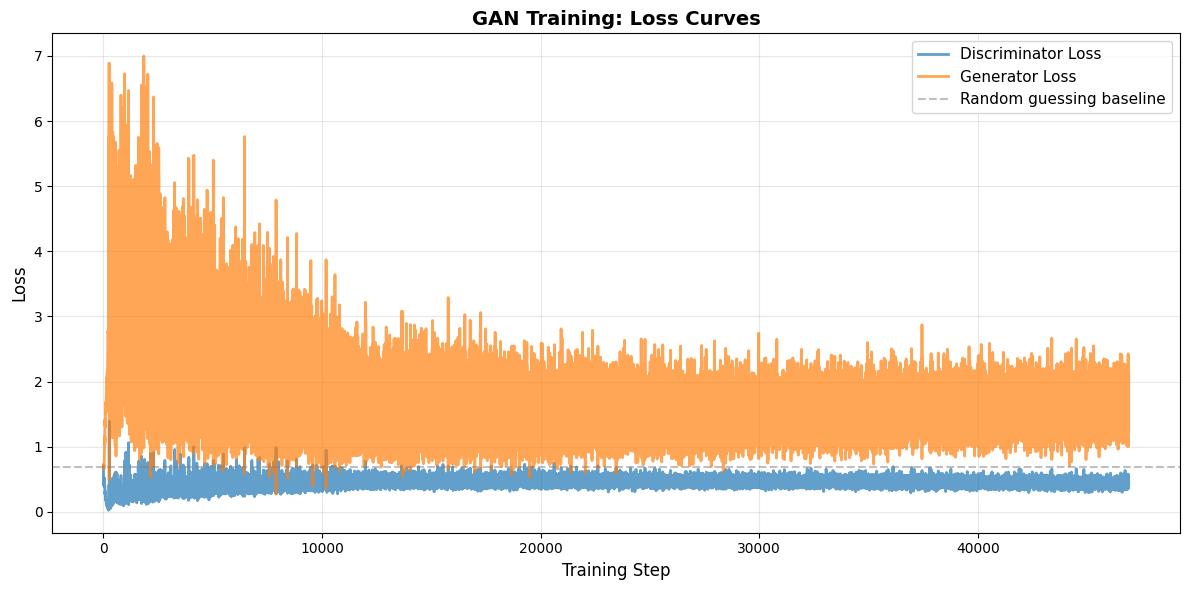

✓ Loss curves saved as 'loss_curves.png'



In [6]:
print("Visualizing loss curves...")
fig = visualize_losses(d_losses, g_losses)
plt.tight_layout()
plt.savefig("loss_curves.png", dpi=150, bbox_inches="tight")
plt.show()
print("✓ Loss curves saved as 'loss_curves.png'\n")


## Section 5: Loss Statistics

In [ ]:
print("=" * 60)
print("LOSS STATISTICS")
print("=" * 60)

print("\nDiscriminator Loss:")
print(f"  Initial: {d_losses[0]:.4f}")
print(f"  Final: {d_losses[-1]:.4f}")
print(f"  Min: {min(d_losses):.4f}")
print(f"  Max: {max(d_losses):.4f}")
print(f"  Average: {np.mean(d_losses):.4f}")
print(f"  Std Dev: {np.std(d_losses):.4f}")

print("\nGenerator Loss:")
print(f"  Initial: {g_losses[0]:.4f}")
print(f"  Final: {g_losses[-1]:.4f}")
print(f"  Min: {min(g_losses):.4f}")
print(f"  Max: {max(g_losses):.4f}")
print(f"  Average: {np.mean(g_losses):.4f}")
print(f"  Std Dev: {np.std(g_losses):.4f}")


## Section 6: Convergence Analysis

In [ ]:
print("\n" + "=" * 60)
print("CONVERGENCE ANALYSIS")
print("=" * 60)

analyze_convergence(d_losses, g_losses)


## Section 7: Generated Samples at Checkpoints

In [ ]:
print("\nVisualizing generated samples at checkpoints...")

num_checkpoints = len(generated_samples)
fig, axes = plt.subplots(2, num_checkpoints // 2, figsize=(20, 4))

for checkpoint_idx, samples in enumerate(generated_samples):
    epoch_num = (checkpoint_idx + 1) * 5
    ax = axes.flatten()[checkpoint_idx]

    # samples is a grid tensor (1, 1, 224, 224)
    # Convert to numpy and plot
    grid_np = samples.squeeze().cpu().detach().numpy()

    ax.imshow(grid_np, cmap="gray")
    ax.set_title(f"Epoch {epoch_num}", fontsize=10, fontweight="bold")
    ax.axis("off")

plt.tight_layout()
plt.savefig("generated_samples_checkpoints.png", dpi=150, bbox_inches="tight")
plt.show()
print("✓ Sample checkpoints saved as 'generated_samples_checkpoints.png'\n")


## Section 8: Convergence Checklist

In [ ]:
print("=" * 60)
print("CONVERGENCE ANALYSIS CHECKLIST")
print("=" * 60)

# Analyze specific failure modes
d_loss_final = d_losses[-1]
d_loss_min = min(d_losses)
d_loss_avg = np.mean(d_losses)
g_loss_final = g_losses[-1]
g_loss_trend = g_losses[-10:] if len(g_losses) >= 10 else g_losses

checks = {
    "D loss dropped too low (< 0.1)": d_loss_min < 0.1,
    "D loss too high (> 0.9)": d_loss_min > 0.9,
    "D loss stabilized (0.3-0.7)": 0.3 < d_loss_final < 0.7,
    "G loss decreasing": np.mean(g_loss_trend) <= np.mean(g_losses[:10]),
    "Losses not oscillating wildly": np.std(d_losses[-50:]) < np.std(d_losses[:50]),
}

print("\nResults:")
for check, result in checks.items():
    status = "✓ PASS" if result else "✗ FAIL"
    print(f"  {status}: {check}")

# Determine overall convergence
num_passed = sum(checks.values())
print(f"\nPassed {num_passed}/{len(checks)} checks")

if num_passed >= 3:
    print("\n✓ LIKELY REACHED NASH EQUILIBRIUM")
    print("  Both networks appear balanced and stable")
else:
    print("\n✗ CONVERGENCE ISSUES DETECTED")
    print("  Check analysis output above for specific failure modes")

print("\n" + "=" * 60)
print("TRAINING COMPLETE")
print("=" * 60)
print("\nNext steps:")
print("  1. Review loss curves and sample checkpoints")
print("  2. Adjust hyperparameters if needed (lr, architecture)")
print("  3. Compare with theoretical GAN training dynamics")
print("  4. Try training on unbalanced dataset for comparison")
